(3600, 19200)
(3, 80, 80)


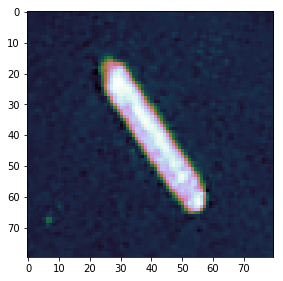

Train on 2240 samples, validate on 560 samples
Epoch 1/25
 - 21s - loss: 0.5476 - acc: 0.7339 - val_loss: 0.3210 - val_acc: 0.8857
Epoch 2/25
 - 21s - loss: 0.2932 - acc: 0.8826 - val_loss: 0.2325 - val_acc: 0.9250
Epoch 3/25
 - 20s - loss: 0.1929 - acc: 0.9232 - val_loss: 0.1804 - val_acc: 0.9375
Epoch 4/25
 - 21s - loss: 0.1608 - acc: 0.9371 - val_loss: 0.1408 - val_acc: 0.9464
Epoch 5/25
 - 20s - loss: 0.1403 - acc: 0.9487 - val_loss: 0.1317 - val_acc: 0.9411
Epoch 6/25
 - 20s - loss: 0.1370 - acc: 0.9415 - val_loss: 0.1080 - val_acc: 0.9571
Epoch 7/25
 - 20s - loss: 0.1166 - acc: 0.9585 - val_loss: 0.0919 - val_acc: 0.9679
Epoch 8/25
 - 21s - loss: 0.1013 - acc: 0.9647 - val_loss: 0.0984 - val_acc: 0.9714
Epoch 9/25
 - 21s - loss: 0.0892 - acc: 0.9647 - val_loss: 0.0755 - val_acc: 0.9714
Epoch 10/25
 - 20s - loss: 0.0932 - acc: 0.9652 - val_loss: 0.0648 - val_acc: 0.9768
Epoch 11/25
 - 20s - loss: 0.0801 - acc: 0.9728 - val_loss: 0.0549 - val_acc: 0.9857
Epoch 12/25
 - 21s - loss: 

In [8]:
import json, sys, random
import numpy as np


from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
import keras.callbacks

from PIL import Image, ImageDraw 
from matplotlib import pyplot as plt
f = open(r'shipsnet.json')
dataset = json.load(f)
f.close()
input_data = np.array(dataset['data']).astype('uint8')
output_data = np.array(dataset['labels']).astype('uint8')



print(input_data.shape)



n_spectrum = 3 # color chanel (RGB)
weight = 80
height = 80
X = input_data.reshape([-1, n_spectrum, weight, height])
print(X[0].shape)


pic = X[50]

rad_spectrum = pic[0]
green_spectrum = pic[1]
blue_spectum = pic[2]


plt.figure(2, figsize = (5*3, 5*1))
plt.set_cmap('cubehelix')

# show each channel
plt.subplot(1, 3, 1)
plt.imshow(rad_spectrum)    
plt.show()

y = np_utils.to_categorical(output_data, 2)

# shuffle all indexes
indexes = np.arange(2800)
np.random.shuffle(indexes)

X_train = X[indexes].transpose([0,2,3,1])
y_train = y[indexes]

# normalization
X_train = X_train / 255


model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(80, 80, 3),strides = (1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.25))

model.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

# optimization setup
sgd = SGD(lr=0.01, momentum=0.9, nesterov=False)
model.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy'])

# training
model.fit(
    X_train, 
    y_train,
    batch_size=64,
    epochs=25,
    validation_split=0.2,
    shuffle=True,
    verbose=2)


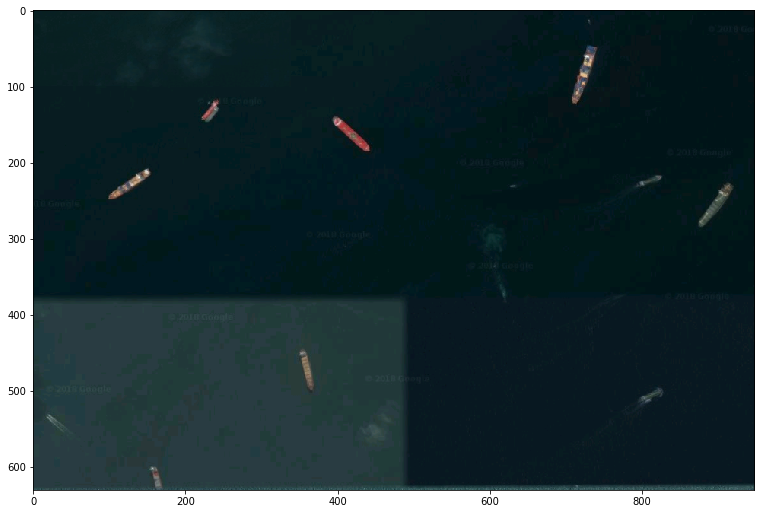

X:0 Y:505  [[0.898279   0.10172103]]


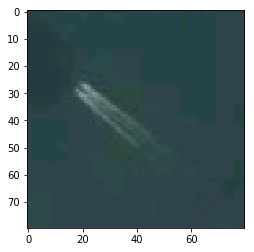

X:65 Y:165  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:65 Y:195  [[0.86131483 0.13868517]]


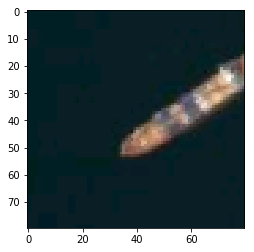

X:65 Y:200  [[0.8247025  0.17529756]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


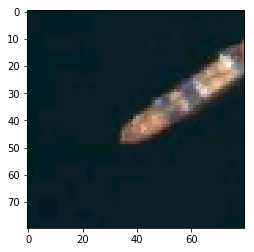

X:70 Y:185  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:70 Y:190  [[0.7932617  0.20673831]]


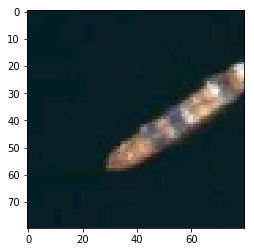

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:70 Y:195  [[0.16201302 0.83798695]]


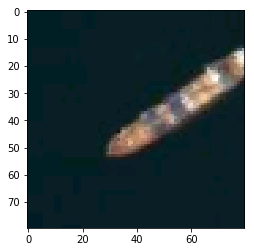

X:70 Y:200  [[0.49252546 0.5074746 ]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


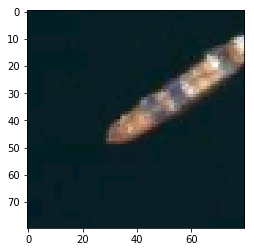

X:75 Y:180  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:75 Y:185  [[0.72742766 0.27257228]]


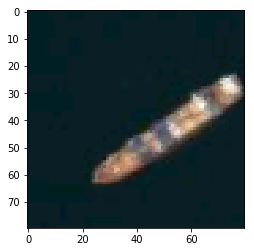

X:75 Y:190  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0.02700383 0.97299623]]


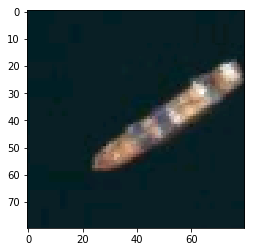

X:75 Y:195  [[0.00692334 0.9930767 ]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


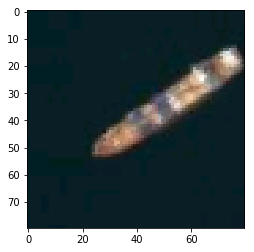

X:75 Y:200  [[0.2813829 0.7186172]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


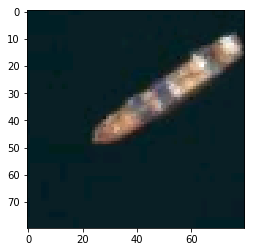

X:80 Y:155  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:80 Y:180  [[0.7822697  0.21773034]]


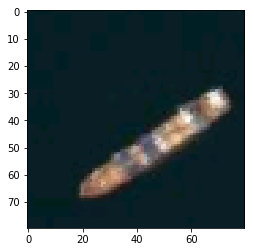

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:80 Y:185  [[0.01451309 0.98548687]]


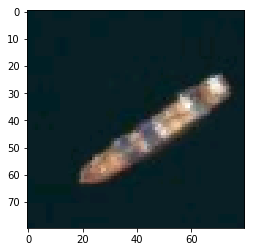

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:80 Y:190  [[5.1104400e-04 9.9948895e-01]]


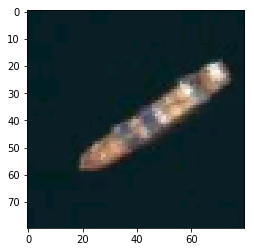

X:80 Y:195  [[0.00243636 0.9975636 ]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


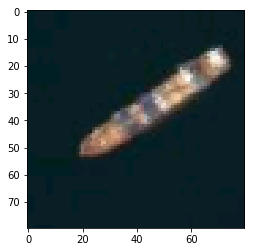

X:80 Y:200  [[0.3044533  0.69554675]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


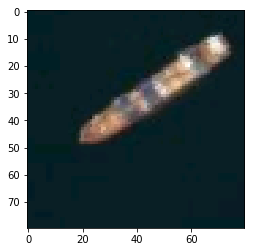

X:85 Y:125  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:85 Y:180  [[0.14753695 0.85246307]]


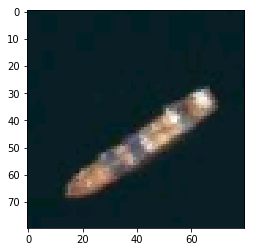

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:85 Y:185  [[0.00139816 0.99860185]]


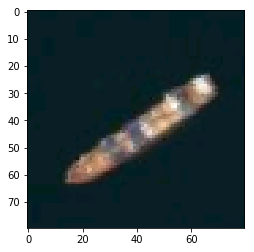

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:85 Y:190  [[4.3490049e-04 9.9956506e-01]]


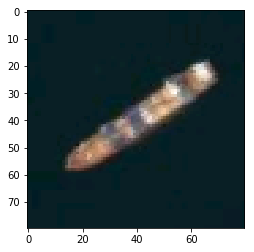

X:85 Y:195  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0.00679718 0.9932028 ]]


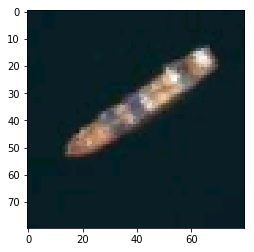

X:85 Y:200  [[0.6254651 0.3745349]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


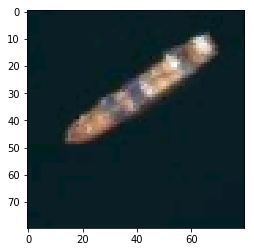

X:90 Y:160  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:90 Y:180  [[0.01740594 0.9825941 ]]


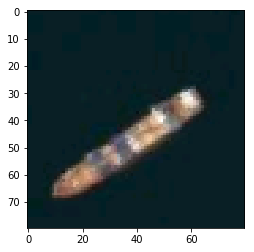

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:90 Y:185  [[0.00158126 0.9984187 ]]


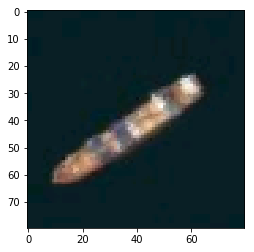

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:90 Y:190  [[0.00735309 0.99264693]]


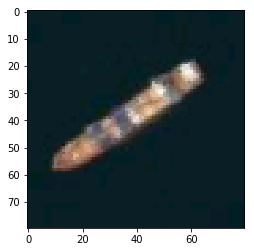

X:90 Y:195  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0.44820476 0.55179524]]


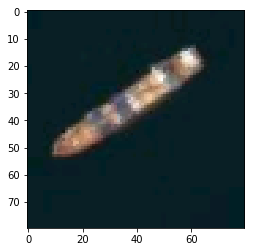

X:95 Y:175  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0.3942557  0.60574436]]


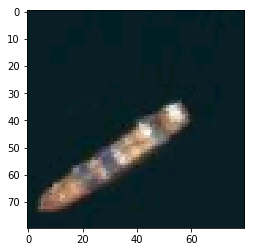

X:95 Y:180  [[0.01917285 0.9808272 ]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


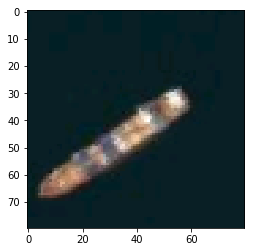

X:95 Y:185  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0.02571251 0.97428757]]


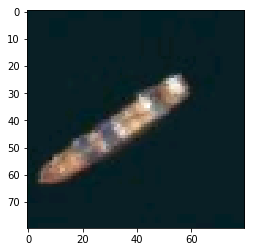

X:95 Y:190  [[0.54305506 0.45694497]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


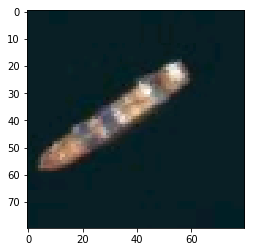

X:100 Y:145  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:100 Y:170  [[0.81814474 0.18185532]]


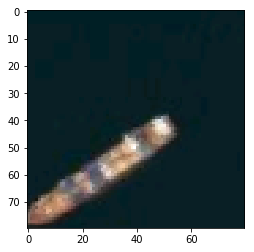

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:100 Y:175  [[0.22880673 0.7711932 ]]


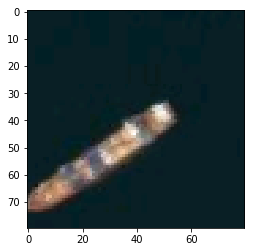

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:100 Y:180  [[0.16422783 0.8357721 ]]


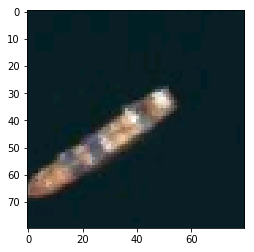

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:100 Y:185  [[0.82903606 0.17096399]]


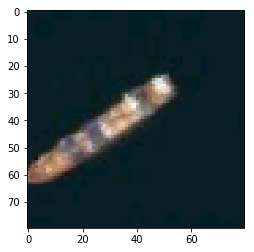

X:105 Y:170  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0.8333205  0.16667952]]


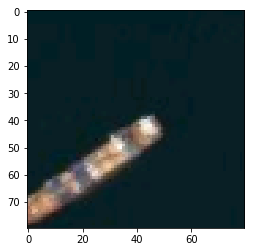

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:105 Y:175  [[0.7241134  0.27588663]]


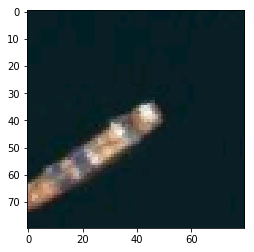

X:190 Y:90  [[0.3017834 0.6982166]]


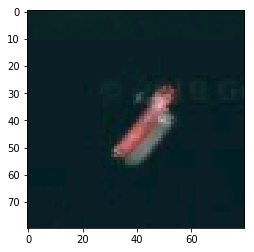

X:190 Y:95  [[0.23832631 0.7616737 ]]


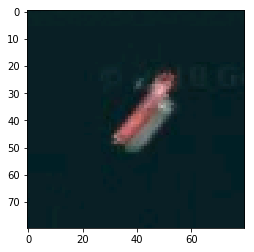

X:190 Y:100  [[0.84495664 0.15504333]]


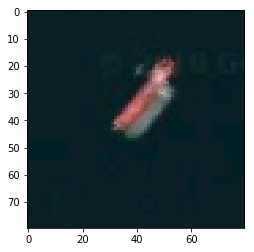

X:195 Y:80  [[0.88409954 0.1159004 ]]


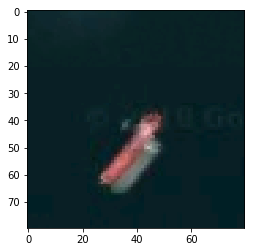

X:195 Y:85  [[0.30046937 0.69953066]]


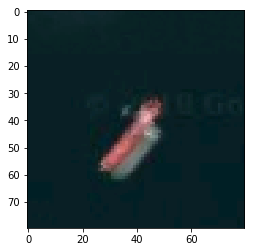

X:195 Y:90  [[0.18832079 0.8116792 ]]


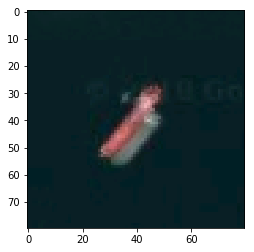

X:195 Y:95  [[0.42059207 0.57940793]]


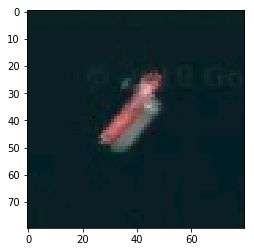

X:200 Y:85   [[0.8169629  0.18303709]]


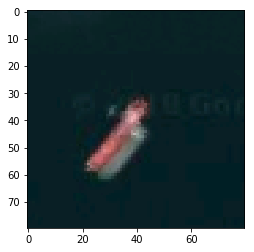

X:200 Y:90  [[0.8689327  0.13106725]]


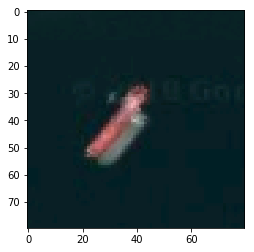

X:315 Y:425  [[0.56128    0.43871993]]


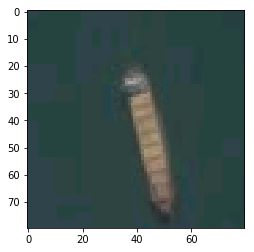

X:315 Y:430  [[0.31146562 0.6885344 ]]


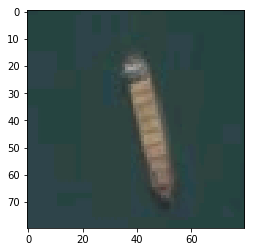

X:315 Y:435  [[0.72530854 0.27469152]]


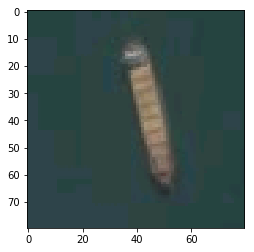

X:320 Y:425  [[0.14268507 0.85731494]]


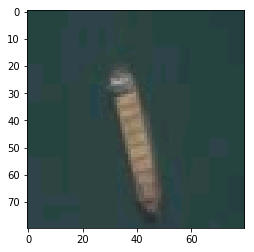

X:320 Y:430  [[0.01726495 0.9827351 ]]


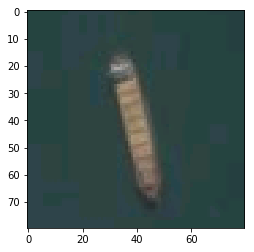

X:320 Y:435  [[0.03613779 0.9638622 ]]


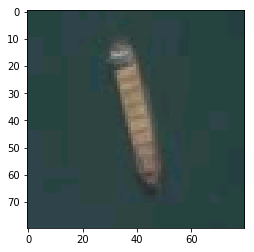

X:320 Y:440  [[0.7518866  0.24811342]]


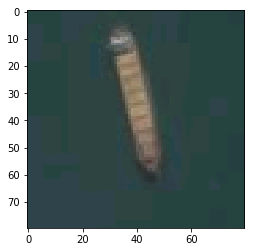

X:325 Y:425  [[0.87610716 0.12389281]]


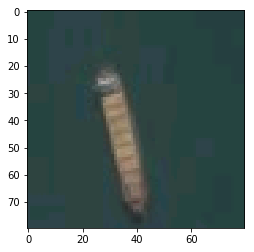

X:325 Y:430  [[0.5759055  0.42409447]]


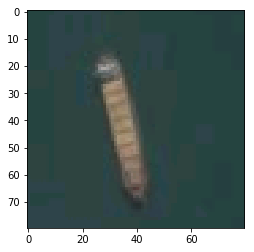

X:325 Y:435  [[0.65089995 0.34910002]]


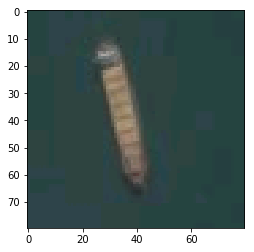

X:370 Y:100  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:370 Y:110  [[0.18147615 0.8185238 ]]


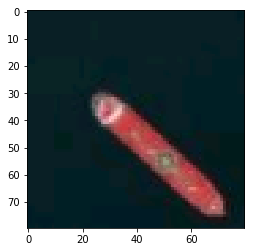

X:370 Y:115  [[2.8114757e-04 9.9971884e-01]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


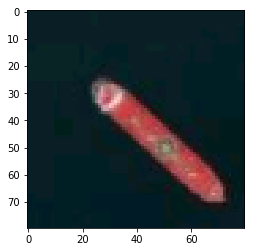

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:370 Y:120  [[0.04407034 0.9559297 ]]


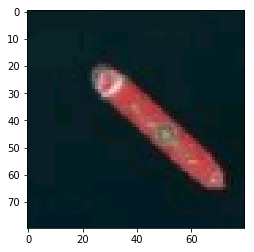

X:375 Y:100  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:375 Y:110  [[0.8142313  0.18576877]]


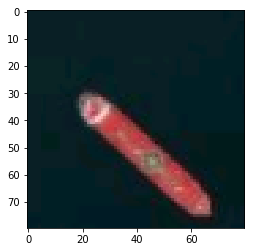

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:375 Y:115  [[1.6604452e-05 9.9998343e-01]]


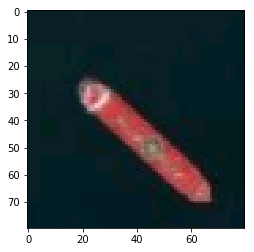

X:375 Y:120  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[2.9562543e-06 9.9999702e-01]]


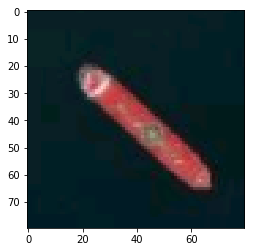

X:375 Y:125  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0.11314113 0.8868588 ]]


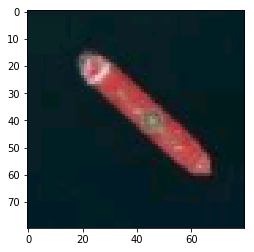

X:380 Y:100  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:380 Y:115  [[6.7282235e-04 9.9932718e-01]]


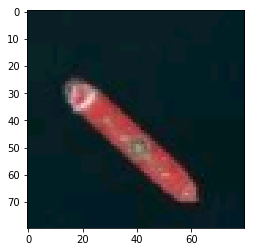

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:380 Y:120  [[2.6929439e-07 9.9999976e-01]]


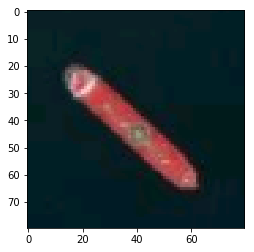

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:380 Y:125  [[4.424271e-06 9.999956e-01]]


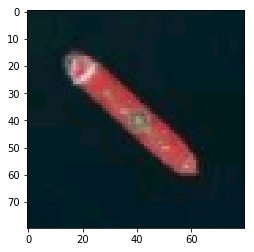

X:385 Y:100  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:385 Y:115  [[0.64200115 0.3579988 ]]


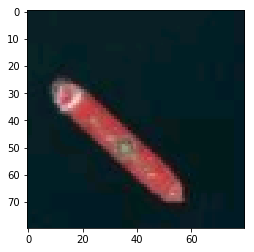

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:385 Y:120  [[6.2746214e-05 9.9993730e-01]]


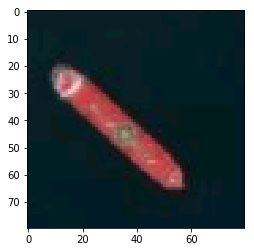

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:385 Y:125  [[1.7448793e-06 9.9999821e-01]]


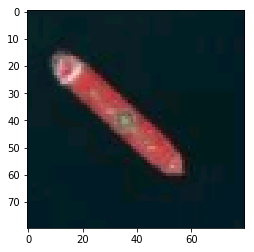

X:385 Y:130  [[0.0026739  0.99732614]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


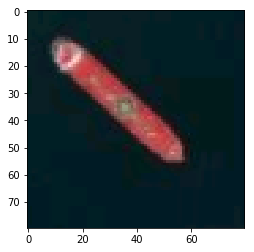

X:390 Y:115  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:390 Y:120  [[0.6523141  0.34768596]]


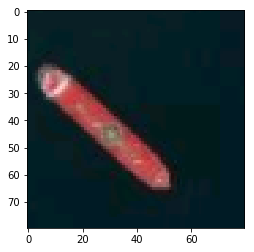

X:390 Y:125  [[0.00537701 0.99462306]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


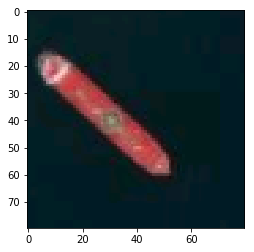

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:390 Y:130  [[0.01410224 0.9858978 ]]


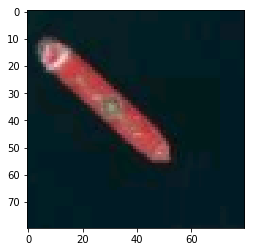

X:395 Y:90   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:395 Y:130  [[0.8851275  0.11487249]]


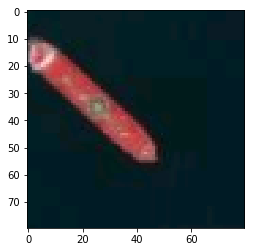

X:675 Y:35   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:675 Y:45  [[0.8896912  0.11030878]]


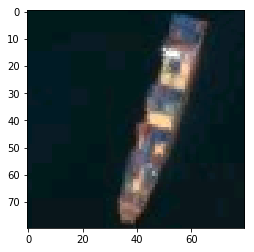

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:675 Y:50  [[0.4998728  0.50012726]]


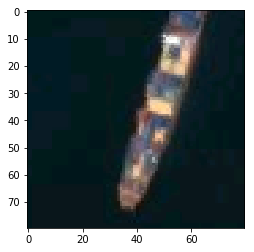

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:675 Y:55  [[0.24132444 0.7586756 ]]


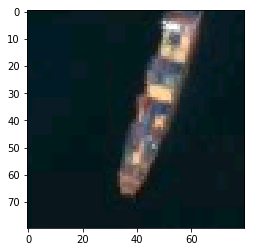

X:675 Y:60  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0.25697932 0.74302065]]


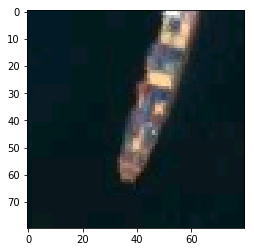

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:675 Y:65  [[0.5182431 0.4817569]]


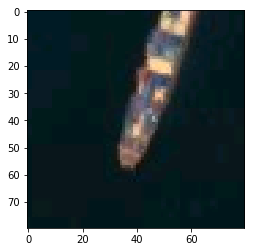

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:675 Y:70  [[0.8781924  0.12180764]]


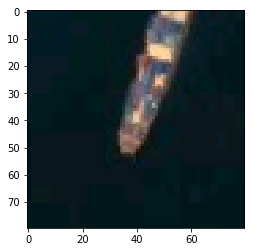

X:680 Y:0    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:680 Y:35  [[0.2358237 0.7641763]]


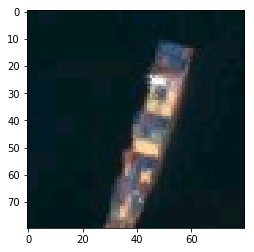

X:680 Y:40  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0.00762912 0.99237084]]


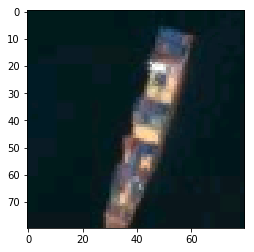

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:680 Y:45  [[9.847248e-04 9.990152e-01]]


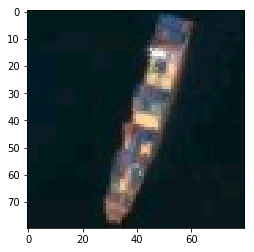

X:680 Y:50  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0.00169912 0.99830085]]


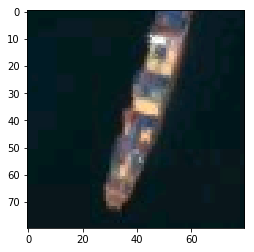

X:680 Y:55  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0.02401742 0.97598255]]


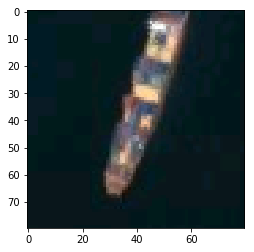

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:680 Y:60  [[0.41009524 0.5899047 ]]


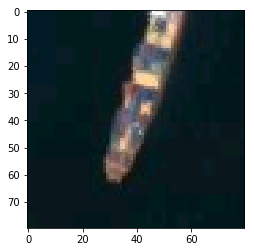

X:685 Y:5    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:685 Y:25  [[0.29764518 0.70235485]]


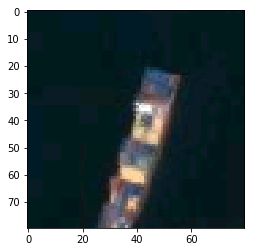

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:685 Y:30  [[0.0167341 0.9832659]]


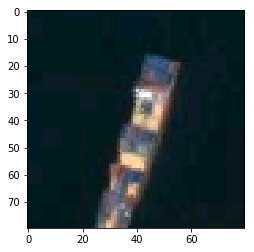

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:685 Y:35  [[0.0010589 0.9989411]]


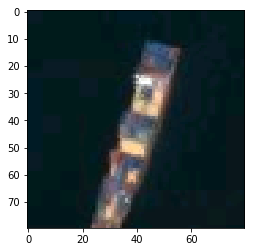

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:685 Y:40  [[7.814134e-04 9.992186e-01]]


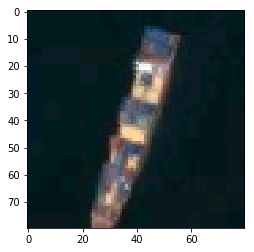

X:685 Y:45  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0.00513536 0.99486464]]


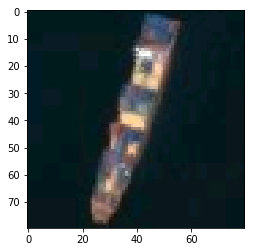

X:685 Y:50  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0.32457694 0.6754231 ]]


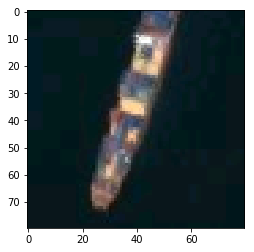

X:690 Y:15   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:690 Y:20  [[0.3850912 0.6149088]]


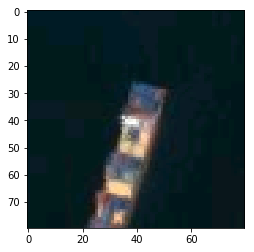

X:690 Y:25  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0.05428004 0.94571996]]


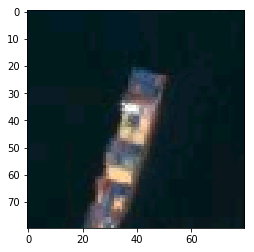

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X:690 Y:30  [[0.05238848 0.9476116 ]]


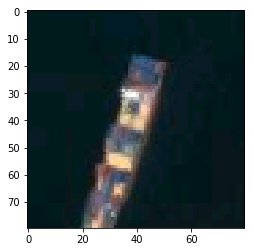

X:690 Y:35  [[0.14426762 0.85573244]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


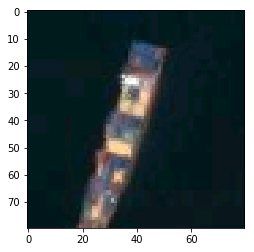

X:690 Y:40  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0.7836729  0.21632712]]


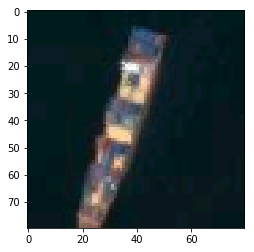

X:750 Y:185  [[0.8933462  0.10665381]]


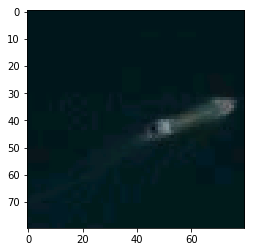

X:755 Y:180  [[0.8590205  0.14097954]]


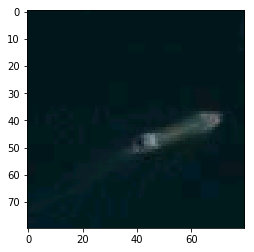

X:755 Y:185  [[0.812189   0.18781097]]


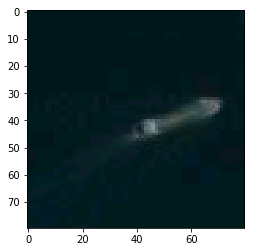

X:755 Y:190  [[0.8716272  0.12837285]]


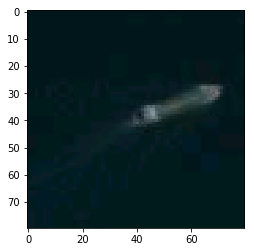

X:760 Y:175  [[0.8889759  0.11102411]]


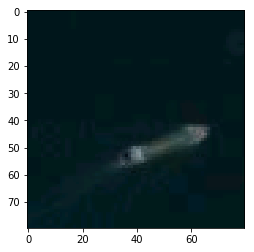

X:760 Y:180  [[0.7872548  0.21274516]]


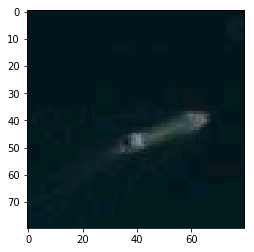

X:760 Y:185  [[0.6683544  0.33164564]]


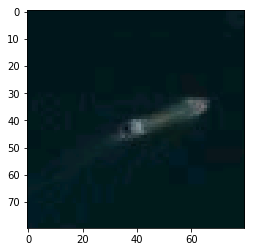

X:760 Y:190  [[0.76633614 0.23366386]]


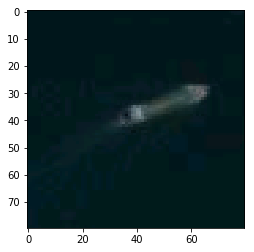

X:765 Y:180  [[0.8347884 0.1652116]]


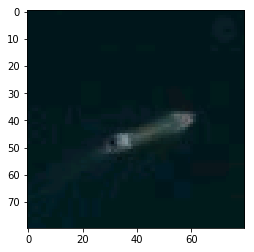

X:765 Y:185  [[0.79977226 0.20022772]]


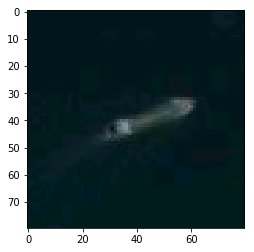

X:765 Y:190  [[0.8465533  0.15344666]]


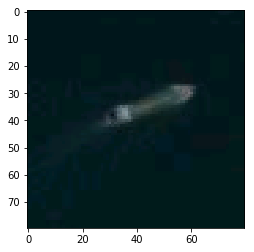

X:765 Y:465  [[0.8733167 0.1266833]]


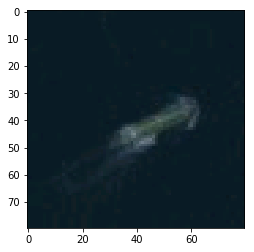

X:765 Y:470  [[0.8671866  0.13281345]]


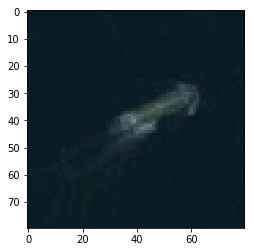

X:770 Y:175  [[0.8923974  0.10760262]]


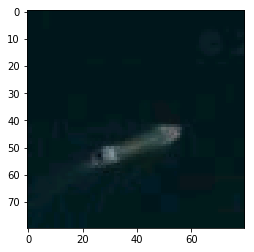

X:770 Y:180  [[0.81754464 0.18245536]]


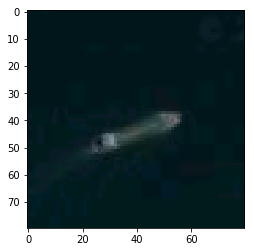

X:770 Y:185  [[0.80445755 0.19554251]]


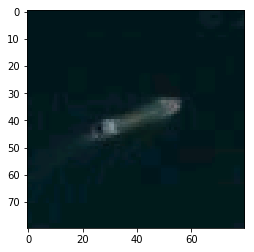

X:770 Y:190  [[0.8417528  0.15824716]]


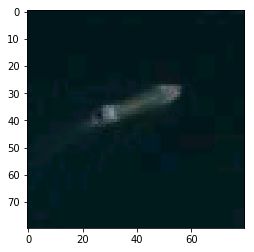

X:775 Y:180  [[0.8732374  0.12676266]]


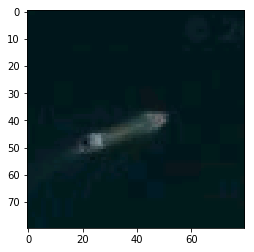

X:775 Y:185  [[0.8722718  0.12772824]]


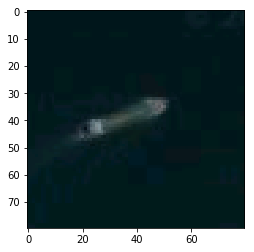

X:780 Y:185  [[0.89466834 0.10533164]]


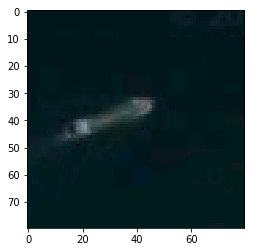

X:780 Y:190  [[0.8896488 0.1103512]]


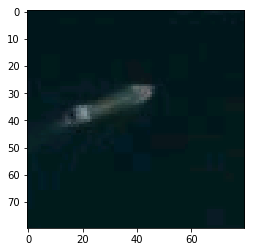

X:845 Y:215  [[0.8458656  0.15413442]]


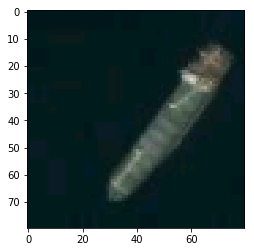

X:845 Y:220  [[0.8800769  0.11992306]]


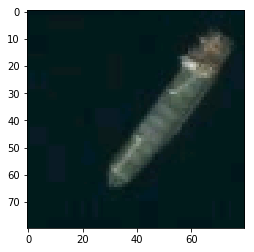

X:850 Y:205  [[0.87878126 0.1212187 ]]


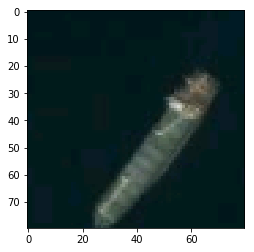

X:850 Y:210  [[0.58793384 0.41206622]]


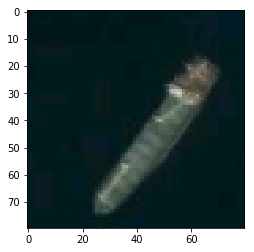

X:850 Y:215  [[0.42856774 0.5714323 ]]


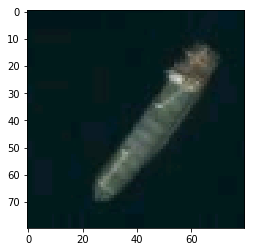

X:850 Y:220  [[0.62236327 0.3776367 ]]


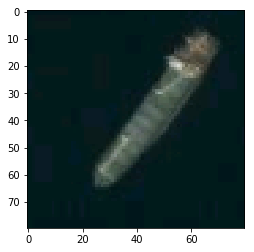

X:850 Y:225  [[0.8232874  0.17671257]]


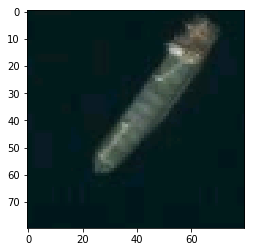

X:855 Y:200  [[0.8497199  0.15028018]]


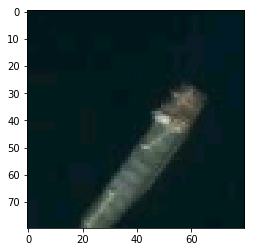

X:855 Y:205  [[0.5743216  0.42567837]]


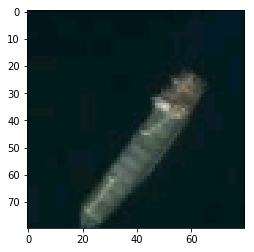

X:855 Y:210  [[0.29955834 0.7004416 ]]


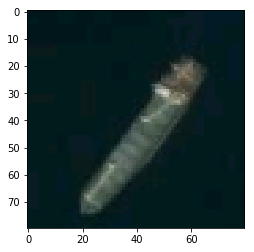

X:855 Y:215  [[0.37783736 0.62216264]]


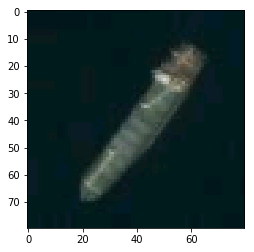

X:855 Y:220  [[0.65719724 0.3428028 ]]


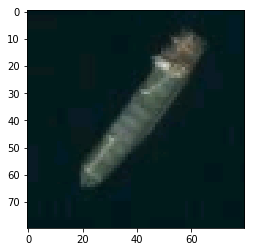

X:855 Y:225  [[0.8962911  0.10370886]]


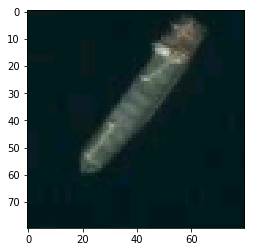

X:860 Y:195  [[0.78160816 0.2183919 ]]


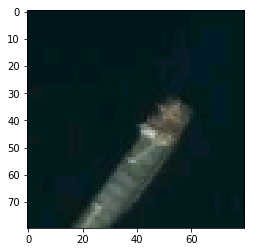

X:860 Y:200  [[0.4640416  0.53595835]]


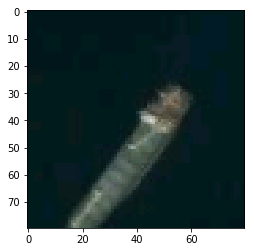

X:860 Y:205  [[0.51472723 0.4852727 ]]


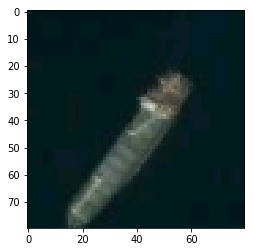

X:860 Y:210  [[0.7116887  0.28831124]]


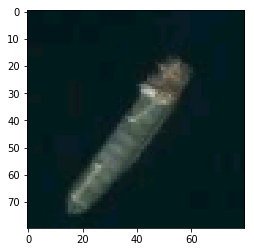

X:860 Y:215  [[0.89450413 0.10549586]]


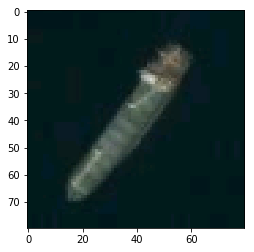

X:860 Y:545  

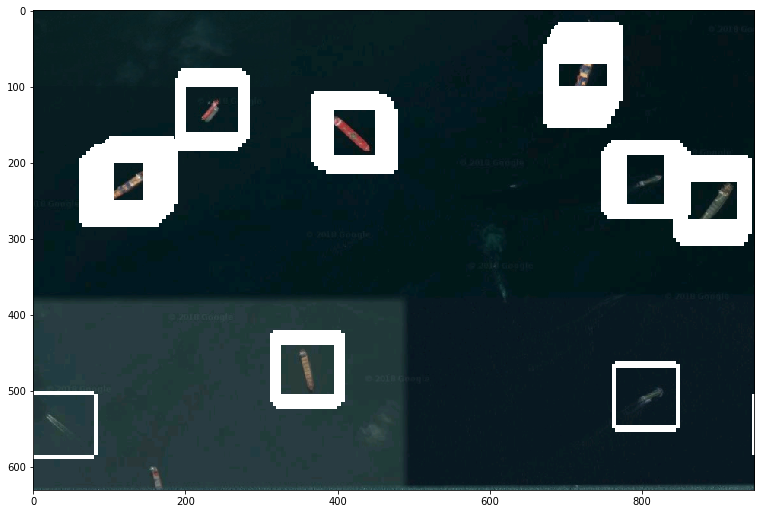

In [12]:
image = Image.open('sing1.png')
pix = image.load()

n_spectrum = 3
width = image.size[0]
height = image.size[1]

# creat vector
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(pix[x, y][chanel])

picture_vector = np.array(picture_vector).astype('uint8')
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0)

plt.figure(1, figsize = (30, 30))

plt.subplot(3, 1, 1)
plt.imshow(picture_tensor)

plt.show()
picture_tensor = picture_tensor.transpose(2,0,1)

def cutting(x, y):
    area_study = np.arange(3*80*80).reshape(3, 80, 80)
    for i in range(80):
        for j in range(80):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 80, 80])
    area_study = area_study.transpose([0,2,3,1])
    area_study = area_study / 225
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study

def not_near(x, y, s, coordinates):
    result = True
    for e in coordinates:
        if x+s > e[0][0] and x-s < e[0][0] and y+s > e[0][1] and y-s < e[0][1]:
            result = False
    return result

def show_ship(x, y, acc, thickness=5):   
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1

    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+80] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+80][x+i] = -1

step = 5; coordinates = []
for x in range(int((width-(85-step))/step)):
    for y in range(int((height-(85-step))/step) ):
        area = cutting(x*step, y*step)
        result = model.predict(area)
        if result[0][1] > 0.10:
            coordinates.append([[x*step, y*step], result])
            print(result)
            plt.imshow(area[0])
            plt.show()

for e in coordinates:
    show_ship(e[0][0], e[0][1], e[1][0][1])

#picture_tensor = picture_tensor.transpose(2,0,1)
picture_tensor = picture_tensor.transpose(1,2,0)
picture_tensor.shape
plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)
